In [2]:
import os
import csv
import numpy as np
import re
import pickle
import json
from tqdm import tqdm
import sys
from math import sqrt
import itertools

### Options

In [3]:
#output_path = r"C:\Users\natal\Desktop\Korpus\debug_1812"
#output_path = r'C:\Users\natal\Desktop\Korpus\run_lsk_201219'
#output_path = r'C:\Users\natal\Desktop\Korpus\run_bote_201219'
#output_path = r'C:\Users\natal\Desktop\Korpus\run_magazin_210104'

#output_path = r'D:\Natalie\13_korpus\run_bote_210216'
output_path = r'/Users/nb/Desktop/MA/13_korpus/run_mag_210216'

# import json

In [4]:
with open(os.path.join(output_path, "sents_w_info.json"), encoding='UTF-8') as json_file:
    all_data = json.load(json_file)
orig_data=all_data

In [5]:
print(len(all_data), type(all_data))
print("---------------------------------------")
print(all_data[0], type(all_data[0]))
print("---------------------------------------")
print(all_data[0]["lsb"], type(all_data[0]["lsb"]))     

248 <class 'list'>
---------------------------------------
{'sentence': ' 1601 ZUM ERSTEN MAL HEISST ES RIGI KULM Der Stadtschreiber von Luzern Renward 48 Cysat erwähnt Kulm als den Namen des höchsten Gipfels der Rigi', 'lsb': [{'ls-wort': 'Gipfels', 'type': 'lsb'}], 'topo_infos': [{'topo': 'Kulm', 'info': [{'uuid': '{25912830-DE2A-44EA-BFBD-4B62474C4CC9}', 'objektart': 'Hauptgipfel', 'geom': 'PKT', 'coords': [2679518.836, 1212280.605, 1797.3652]}]}, {'topo': 'Rigi', 'info': [{'uuid': '{22435B69-8496-4610-AAFE-6D480E492A6A}', 'objektart': 'Haltestelle Bahn', 'geom': 'PKT', 'coords': [2678670.216, 1211912.883, 1603.4762]}, {'uuid': '{41B85DCA-4A79-4672-B5FB-557BDE4B4A23}', 'objektart': 'Massiv', 'geom': 'PLY', 'coords': [2681802.892, 1209422.853, 641.54855]}]}], 'ID': 1} <class 'dict'>
---------------------------------------
[{'ls-wort': 'Gipfels', 'type': 'lsb'}] <class 'list'>


# filter topos

In [6]:
# fehler und ambiguous etc. rausfiltern
# Löschen von: Alp, Au, Berg, Tal, Dorf, Fall, Land, Platz, Felsen, Ort, Sonne, Länder, Kreuz, Gross, Hand, 
# Paradies, Peter, Post, Port, Quai, Steg, Stein, Stock, Strich, Waldhütte, Tisch, Wurf, Blatt, Bad, Badi
# Löwen, Gisler, Suter, Vogler, Vogt, Holz
# Adelboden, Albis, Saas (Fee), Wallis 
nr_deleted = 0
nr_deleted_lsb = 0
nr_empty = 0

for i in range(len(all_data)):
        #print(small_data[i].keys()) #dict_keys(['sentence', 'lsb', 'topo_infos']) str, list, list
        #print(len(small_data[i]['topo_infos']))
        for j in range(len(all_data[i]['topo_infos'])-1, -1, -1):
            #print("topo_infos: ", small_data[i]['topo_infos'][j])
            #for k in range(len(small_data[i]['topo_infos'][j]['info'])):
            #print("info: ", small_data[i]['topo_infos'][j]['info'][0])
            #print("geom:" , small_data[i]['topo_infos'][j]['info'][0]['geom'])
                #for l in range(len(small_data[i]['topo_infos'][j]['info'][k])):
            #print("topo: ", small_data[i]['topo_infos'][j]['topo'])
            if all_data[i]['topo_infos'][j]['topo'] in ["Alp","Au","Bauernhof","Berg","Tal","Dorf","Fall","Land","Platz",
                                                          "Felsen","Ort","Sonne","Länder","Kreuz","Gross","Hand",
                                                          "Paradies","Peter","Post","Port","Quai","Steg","Stein",
                                                          "Stock","Strich","Waldhütte","Tisch","Wurf","Blatt","Bad",
                                                          "Badi","Löwen","Gisler","Suter","Vogler","Vogt","Holz",
                                                          "Adelboden","Albis","Saas","Wallis","Zug"]:
                #print(all_data[i]['topo_infos'][j])
                ################## bspw. Waldhütte 19x im ganzen Boten-Korpus, Vogler 3311, Au 5809
                print(all_data[i]['topo_infos'][j]['topo'], " got deleted --------------------")
                all_data[i]['topo_infos'].pop(j)
                print(all_data[i]['topo_infos'])
                nr_deleted += 1
        for j in range(len(all_data[i]['lsb'])-1, -1, -1):
            #print("topo_infos: ", small_data[i]['topo_infos'][j])
            #for k in range(len(small_data[i]['topo_infos'][j]['info'])):
            #print("info: ", small_data[i]['topo_infos'][j]['info'][0])
            #print("geom:" , small_data[i]['topo_infos'][j]['info'][0]['geom'])
                #for l in range(len(small_data[i]['topo_infos'][j]['info'][k])):
            #print("topo: ", small_data[i]['topo_infos'][j]['topo'])
            if all_data[i]['lsb'][j]['ls-wort'] in ["Weg", "Wetter", "Sattel", "Terrasse", "Tierpark", "Haus", "Restaurant"]:
                #print(all_data[i]['topo_infos'][j])
                ################## bspw. Waldhütte 19x im ganzen Boten-Korpus, Vogler 3311, Au 5809
                print(all_data[i]['lsb'][j]['ls-wort'], " got deleted --------------------")
                all_data[i]['lsb'].pop(j)
                print(all_data[i]['lsb'])
                nr_deleted_lsb += 1
                
print("nr deleted topos: ", nr_deleted)
print("nr deleted lsb: ", nr_deleted_lsb)

Berg  got deleted --------------------
[{'topo': 'Bergen', 'info': [{'uuid': '{13E4FDF3-9D2A-4E39-9B5D-4416D361B6A8}', 'objektart': 'Lokalname swisstopo', 'geom': 'PKT', 'coords': [2706982.928, 1199311.503, 1069.582]}, {'uuid': '{948496DB-1DF4-45E8-B953-838EAD461B62}', 'objektart': 'Gebiet', 'geom': 'PLY', 'coords': [2707303.569, 1205652.103, 1539.80835]}]}, {'topo': 'Wägital', 'info': [{'uuid': '{0AB26255-5359-4C45-96D6-9CB8A7DF84DE}', 'objektart': 'Skilift', 'geom': 'LIN', 'coords': [2709744.869, 1219988.189, 949.2059895]}, {'uuid': '{F9EB841D-73C0-42E2-84DC-4E0124A7C415}', 'objektart': 'Campingplatzareal', 'geom': 'PLY', 'coords': [2710941.513, 1219742.666, 740.3351]}, {'uuid': '{B955B9D7-435A-4759-BF39-CAC5A521DF26}', 'objektart': 'Tal', 'geom': 'PLY', 'coords': [2711820.816, 1218108.038, 1146.92975]}]}, {'topo': 'Lachen', 'info': [{'uuid': '{D5BAC00B-1924-47D5-AFA3-776CC6FF3B32}', 'objektart': 'Flurname swisstopo', 'geom': 'PKT', 'coords': [2715910.342, 1222054.707, 1408.2624]}, {

In [7]:
# Testen: wieviele Sätze bleiben noch 
print(len(orig_data))
for i in range(len(all_data)-1, -1, -1):
    #for j in range(len(small_data[i]['topo_infos'])):
    #print("topo_infos: ", all_data[i]['topo_infos'])
    if len(all_data[i]['topo_infos'])==0 or len(all_data[i]['lsb'])==0:
        nr_empty+=1
        all_data.pop(i)
print("Alle Sätze: ", len(orig_data)) 
print("nr. deleted topos: ", nr_deleted) 
print("nr. deleted lsb: ", nr_deleted_lsb)
print("Verbleibende Sätze: ", len(orig_data)-nr_empty, len(all_data))


248
Alle Sätze:  220
nr. deleted topos:  123
nr. deleted lsb:  19
Verbleibende Sätze:  192 220


# Nr. of Unique Topos in Sätzen

In [8]:
# wieviele Sätze beinhalten zumindest ein einzigartiges Toponym ---> 2993 von 6100
unique_topos = 0
for sentence_info in all_data:
    if any([len(ti["info"]) == 1 for ti in sentence_info["topo_infos"]]):
        unique_topos+=1

print(unique_topos)
# die anderen löschen oder nicht?  Da nur 2993 der Sätze zumindest ein eindeutiges Toponym enthalten, werden die restlichen 3107

121


In [9]:
def occurs_once(topo_infos):
    unique_geoms=0
    for topo_info in topo_infos:
        geom_list=[]
        for info in topo_info['info']:
            geom_list.append(info['geom'])
        if len(geom_list) == len(set(geom_list)):
            unique_geoms+=1
    return unique_geoms

# wieviele Sätze beinhalten zumindest ein einzigartiges Toponym, wenn die geom beachtet wird ---> 4335 von 6100
unique_topos = 0
for sentence_info in all_data:
    if occurs_once(sentence_info["topo_infos"])>0:
        unique_topos+=1

print(unique_topos)

178


In [10]:
len(all_data)

220

# disambiguation regeln

In [11]:
def get_unique_topogeoms(all_data):
    UUID = []
    LSB = []
    sen_ID = []
    unique_topo = []

# Alle eindeutigen Topos speichern inkl. verschiedene Geometrien
    for obj in all_data:
        unique_geoms=0
        unique_topo_in_sen = []
        for topo_info in obj["topo_infos"]:
            infos = topo_info["info"]
            geom_list=[]
            index_list=[]
            for info, index in zip(topo_info['info'], range(len(topo_info['info']))):
                geom_list.append(info['geom'])
                index_list.append(index)
            if len(geom_list) == len(set(geom_list)):
                unique_geoms+=1
                for info, i in zip(topo_info['info'], range(len(topo_info['info']))):
                    if i in index_list:
                        UUID.append(infos[i]['uuid'])
                        sen_ID.append(obj["ID"])

                        LSB_temp = []
                        for lsb in obj["lsb"]:
                            LSB_temp.append(lsb['ls-wort'])
                        LSB.append(LSB_temp)
                        unique_topo_in_sen.append(infos[0])
        
        unique_topo.append(unique_topo_in_sen)

    assert len(unique_topo) == len(all_data)
    return UUID, LSB, sen_ID, unique_topo

In [12]:
def get_unique_topos(all_data):
    UUID = []
    LSB = []
    sen_ID = []
    unique_topo = []

    for obj in all_data:
        unique_topo_in_sen = []
        for topo_info in obj["topo_infos"]:
            infos = topo_info["info"]

# Alle eindeutigen Topos speichern 
            if len(infos)==1:
                UUID.append(infos[0]['uuid'])
                sen_ID.append(obj["ID"])

                LSB_temp = []
                for lsb in obj["lsb"]:
                    LSB_temp.append(lsb['ls-wort'])
                LSB.append(LSB_temp)
                unique_topo_in_sen.append(infos[0])
        unique_topo.append(unique_topo_in_sen)

    assert len(unique_topo) == len(all_data)
    return UUID, LSB, sen_ID, unique_topo

In [13]:
def distance(a, b):
    return sqrt(sum([(a["coords"][i]-b["coords"][i])**2 for i in range(3)]))


def calculate_total_dist_in_tuple(index_tuple, topo_infos):
    sum_dist = 0
    
    tuple_infos = []
    for topo_index, topo_info in zip(index_tuple, topo_infos):
        tuple_infos.append(topo_info["info"][topo_index])
    
    for ti1 in tuple_infos:
        for ti2 in tuple_infos:
            sum_dist += distance(ti1, ti2)
        
    return sum_dist / 2

def find_clusters(topo_infos):
    min_dist = 1e20
    min_index_tuple = None
    
    info_lists = [list(range(len(topo["info"]))) for topo in topo_infos]

    for index_tuple in itertools.product(*info_lists):
        dist = calculate_total_dist_in_tuple(index_tuple, topo_infos)
    
        #print(index_tuple, dist, min_dist)
        if dist < min_dist:
            min_index_tuple = index_tuple
            min_dist = dist
            min_tuple_info = []
            for index, topo in zip(min_index_tuple, topo_infos):
                min_tuple_info.append(topo["info"][index])
            
    return min_index_tuple, min_tuple_info

# one rule to rule them all: cluster

In [14]:
all_data_temp = all_data
len(all_data_temp)

220

In [15]:
#csv pro UUID mit Koordinaten, ID pro Satz, LSB als Liste
UUID = []
LSB = []
SEN_ID = []

all_data = all_data[:10]
all_data = all_data_temp

for obj in all_data:
    cluster_indices, cluster_infos = find_clusters(obj['topo_infos'])
    for info in cluster_infos:
        UUID.append(info['uuid'])
        SEN_ID.append(obj["ID"])

        LSB_temp = []
        for lsb in obj["lsb"]:
            LSB_temp.append(lsb['ls-wort'])
        LSB.append(LSB_temp)

with open(f"{output_path}/coords_list.csv", 'w', encoding="utf-8") as output_file:
    csv_out=csv.writer(output_file)
    csv_out.writerow(['uuid', 'sen_id','lsb'])
    for uuid, sen_id, lsb in zip(UUID, SEN_ID, LSB):
        csv_out.writerow([uuid, sen_id, lsb]) 

In [16]:
len(all_data)

220

In [25]:
print(all_data)

[{'sentence': ' 1601 ZUM ERSTEN MAL HEISST ES RIGI KULM Der Stadtschreiber von Luzern Renward 48 Cysat erwähnt Kulm als den Namen des höchsten Gipfels der Rigi', 'lsb': [{'ls-wort': 'Gipfels', 'type': 'lsb'}], 'topo_infos': [{'topo': 'Kulm', 'info': [{'uuid': '{25912830-DE2A-44EA-BFBD-4B62474C4CC9}', 'objektart': 'Hauptgipfel', 'geom': 'PKT', 'coords': [2679518.836, 1212280.605, 1797.3652]}]}, {'topo': 'Rigi', 'info': [{'uuid': '{22435B69-8496-4610-AAFE-6D480E492A6A}', 'objektart': 'Haltestelle Bahn', 'geom': 'PKT', 'coords': [2678670.216, 1211912.883, 1603.4762]}, {'uuid': '{41B85DCA-4A79-4672-B5FB-557BDE4B4A23}', 'objektart': 'Massiv', 'geom': 'PLY', 'coords': [2681802.892, 1209422.853, 641.54855]}]}], 'ID': 1}, {'sentence': ' 26 höf höfe 29 SAGT JÖRG SCHIEBEL CEO DER YCO AG IN PFÄFFIKON ILLUSTRATION Caroline Weber Fischer von Andreas Lukoschik er im Grandhotel Dolder an die Decke geht mit den Blicken sieht dort nicht wie andernorts weiss verkleidete Rauchmelder sondern vergoldete', 

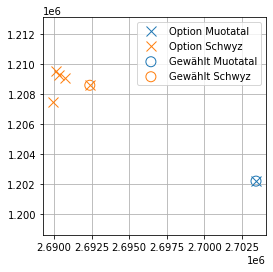

In [134]:
import matplotlib.pyplot as plt
obj = all_data[82]
cluster_indices, cluster_infos = find_clusters(obj['topo_infos'])

x = [[info["coords"][0] for info in topo_info["info"]] for topo_info in obj['topo_infos']]
y = [[info["coords"][1] for info in topo_info["info"]] for topo_info in obj['topo_infos']]

plt.figure(figsize=(4,4))
for i, (index, x_sub, y_sub) in enumerate(zip(cluster_indices, x, y)):
    plt.plot(x_sub, y_sub, linestyle=" ", marker='x', markersize=10, label=f"Option {obj['topo_infos'][i]['topo']}", color=f"C{i}")
    plt.scatter(x_sub[index], y_sub[index], s=100.0, marker='o', facecolors='none', color=f"C{i}", label=f"Gewählt {obj['topo_infos'][i]['topo']}")
    
plt.axis('equal')
plt.grid()
plt.legend()
plt.savefig("method.pdf")

In [49]:
obj['topo_infos']
obj["topo_infos"][i]["topo"]

'Lachen'

In [17]:
#csv pro UUID, Satz-ID als Liste, LSB als Liste

UUID = {}
LSB = []
SEN_ID = []

all_data = all_data[:10]
all_data = all_data_temp

for obj in all_data:
    cluster_indices, cluster_infos = find_clusters(obj['topo_infos'])
    for info in cluster_infos:
        if info['uuid'] not in UUID:
            SEN_ID.append(obj["ID"])
            LSB_temp = []
            for lsb in obj["lsb"]:
                LSB_temp.append(lsb['ls-wort'])
                LSB.append(LSB_temp)
            UUID[info['uuid']] = (SEN_ID, LSB)
        else:
            SEN_ID.append(obj["ID"])
            LSB_temp = []
            for lsb in obj["lsb"]:
                LSB_temp.append(lsb['ls-wort'])
                LSB.append(LSB_temp)
            UUID[info['uuid']]+=(SEN_ID, LSB)
